## Data Preprocessing

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from src.dataProcessor.DataProcessor import DataProcessor
from src.utils.util import *

In [5]:
df = pd.read_csv("../data/multiclass1.csv")
df.shape
# df_oot=pd.read_csv('../df_oot.csv',index_col=0)
# df.shape,df_oot.shape

(268167, 87)

In [6]:
df.head()

,Abuse__DOT__completed_afn_orders_by_customer_marketplace__DOT__n_afn_unit_amount_last_365_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_90_days,Abuse__DOT__cluster_edx_intransit_by_customer_marketplace_na__DOT__n_cluster_max_intransit_si_last_180_days,Abuse__DOT__cluster_nonsellable_returns_by_customer_marketplace__DOT__n_cluster_nsr_unit_count_last_90_days,payment_risk__DOT__customer_contacts_by_customerid_precomp_region__DOT__n_customer_contact_by_phone_cnt_30d,Abuse__DOT__cluster_mfn_refunds_by_customer_marketplace__DOT__n_cluster_mfn_refund_unit_amount_last_180_days,ORDER_TOTAL,Abuse__DOT__cluster_completed_afn_orders_by_customer_marketplace__DOT__n_cluster_afn_unit_count_last_90_days,Abuse__DOT__notr_forwardlooking_si_by_customer_marketplace__DOT__n_notr_forwardlooking_si_last_180_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_365_days,...,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_30_days,marketplacId,is_abuse,condition,e90,ce90,conc,si90,csi90,multiclass
0,75131.53,0.000000,0.00,0,0,0.0,74.00,20,0.003143,0.000000,...,0.000000,33,1,1,0,0,0,0.0,0.0,condition
1,12384.60,0.112823,0.00,1,0,0.0,1500.25,17,0.121512,0.089448,...,0.134226,33,0,0,0,0,0,0.0,0.0,neg
2,733.00,0.000000,0.00,0,0,0.0,209.00,3,0.291899,0.000000,...,0.000000,33,0,0,0,0,0,0.0,0.0,neg
3,882.36,0.052124,0.00,2,0,0.0,599.99,7,0.491324,0.031178,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg
4,3599.98,0.270178,8.17,2,0,0.0,15.99,45,0.021619,0.232532,...,0.365031,15,0,0,0,0,0,0.0,0.0,neg


In [23]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)
df_train.shape, df_test.shape

((241350, 87), (26817, 87))

In [24]:
label_cols = ["is_abuse", "condition", "e90", "ce90", "conc", "si90", "csi90"]
label_col_multiclass = "multiclass"

train_cols = []
for i in df_train.columns:
    if i != label_col_multiclass and i not in label_cols:
        train_cols.append(i)
len(train_cols)

79

In [25]:
X_train = df_train[train_cols]
Y_train = df_train[label_cols]
X_test = df_test[train_cols]
Y_test = df_test[label_cols]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((241350, 79), (241350, 7), (26817, 79), (26817, 7))

In [393]:
from sklearn.utils import resample

df_positive = df_train[df_train["is_abuse"] == 1]
df_negative = df_train[df_train["is_abuse"] == 0]

len(df_negative)
# Downsample the negative class
df_negative_downsampled = resample(
    df_negative,
    replace=False,  # No replacement
    n_samples=int(0.5 * df_negative.shape[0]),  # Match the size of the positive class
    random_state=42,
)  # Set random state for reproducibility

# Combine the downsampled negative class with the positive class
df_train_downsampled = pd.concat([df_positive, df_negative_downsampled])

# Shuffle the final dataframe (optional, to randomize the order)
df_train_downsampled = df_train_downsampled.sample(frac=1, random_state=42).reset_index(
    drop=True
)
df_train_downsampled.shape

(141144, 87)

In [394]:
X_train = df_train_downsampled[train_cols]
Y_train = df_train_downsampled[label_cols]
X_test = df_test[train_cols]
Y_test = df_test[label_cols]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((141144, 79), (141144, 7), (26817, 79), (26817, 7))

In [395]:
Y_train

,is_abuse,condition,e90,ce90,conc,si90,csi90
0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0.0,0.0
2,1,1,0,0,0,0.0,0.0
3,0,0,0,0,0,0.0,0.0
4,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...
141139,0,0,0,0,0,0.0,0.0
141140,0,0,0,0,0,0.0,0.0
141141,0,0,0,0,0,0.0,0.0
141142,0,0,0,0,0,0.0,0.0


## Baseline Single Lgb Models （ignore it for now）

In [9]:
#!pip install lightgbm

In [11]:
from src.model.LgbBaseline import LgbBaseline

In [17]:
params = {
    "metric": "auc",
    "max_depth": 16,
    "learning_rate": 0.05,
    "bagging_fraction": 0.9,
    "feature_fraction": 0.9,
    "verbose": -1,
    "lambda_l1": 0.5,
    "lambda_l2": 0.05,
    "num_leaves": 500,
    "min_child_weight": 0.1,
    "min_data_in_leaf": 25,
    "num_threads": 75,
    "metric_freq": 10,
    "data_random_seed": 17,
    "objective": "binary",
}

In [20]:
base = LgbBaseline(X_train, Y_train, X_test, Y_test, params)

AttributeError: 'DataFrame' object has no attribute 'paymeth'

In [33]:
base.baseline_model()

Overall lgb result: 
[50]	valid_0's auc: 0.975465
[100]	valid_0's auc: 0.980027
[150]	valid_0's auc: 0.982117
[200]	valid_0's auc: 0.983303
[250]	valid_0's auc: 0.984009
[300]	valid_0's auc: 0.9845
[350]	valid_0's auc: 0.984846
[400]	valid_0's auc: 0.985111
[450]	valid_0's auc: 0.985315
[500]	valid_0's auc: 0.985475
[550]	valid_0's auc: 0.985598
[600]	valid_0's auc: 0.985698
[650]	valid_0's auc: 0.985779
[700]	valid_0's auc: 0.985854
[750]	valid_0's auc: 0.985924
[800]	valid_0's auc: 0.985976
[850]	valid_0's auc: 0.986035
[900]	valid_0's auc: 0.986092
[950]	valid_0's auc: 0.986132
[1000]	valid_0's auc: 0.98618
test metrics: 0.986146307461053 0.125007021152576 0.9695490617646836
CC single lgb result: 
[50]	valid_0's auc: 0.97512
[100]	valid_0's auc: 0.979488
[150]	valid_0's auc: 0.981405
[200]	valid_0's auc: 0.982323
[250]	valid_0's auc: 0.982841
[300]	valid_0's auc: 0.983166
[350]	valid_0's auc: 0.983391
[400]	valid_0's auc: 0.983545
[450]	valid_0's auc: 0.983646
[500]	valid_0's auc: 0

## Weighted MTGBM with KD Loss Implementation

In [396]:
# ---- This chunck is for reloading updated classes when you want to change parameters in model or objective function.

import importlib
import src

importlib.reload(src.lossFunction.customLossKDswap)
importlib.reload(src.model.Mtgbm)

<module 'src.model.Mtgbm' from '/home/ec2-user/SageMaker/SecureAISandbox-CodeCommitRepository-shemingx-us-east-1/Multitask_learning/PFOC/mtgbm/src/model/Mtgbm.py'>

In [397]:
import os

In [398]:
os.getcwd()

'/home/ec2-user/SageMaker/SecureAISandbox-CodeCommitRepository-shemingx-us-east-1/Multitask_learning/PFOC/mtgbm'

In [399]:
from src.lossFunction.customLossKDswap import custom_loss_KDswap
from src.model.Mtgbm import MtGbm

In [400]:
# pip install wheel

In [401]:
# pip install lightgbm

In [402]:
Y_train.shape[1] - 1

6

In [403]:
mt_params = {
    "objective": "custom",
    "num_labels": Y_train.shape[1] - 1,
    "tree_learner": "serial2",
    "boosting": "gbdt",
    "max_depth": 16,
    "learning_rate": 0.05,  # 0.03
    "bagging_fraction": 0.9,
    "feature_fraction": 0.9,
    "verbosity": 1,
    "lambda_l1": 0.5,
    "lambda_l2": 0.05,
    "num_leaves": 750,  # 750,
    "min_child_weight": 0.1,
    "min_data_in_leaf": 100,  # 100,
    "num_threads": 80,
    "metric_freq": 10,
    "data_random_seed": 17,
    "verbose_eval": 50,
    "num_rounds": 200,
    "early_stopping_rounds": -1,
}
main_target = "is_abuse"
targets = ["condition", "e90", "ce90", "conc", "si90", "csi90"]

In [404]:
mtg = MtGbm(
    mt_params, X_train, Y_train, X_test, Y_test, main_target, targets, "auto_weight"
)

### Model training

Training set size:  (141144, 79)
Training main task shape:  141144  Training sub tasks shape:  (141144, 6)
[LightGBM] [Info] Length of label is not same with #data
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Info] Total Bins 11593
[LightGBM] [Info] Number of data points in the train set: 127029, number of used features: 67
[LightGBM] [Info] Length of label is not same with #data
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
--- tas

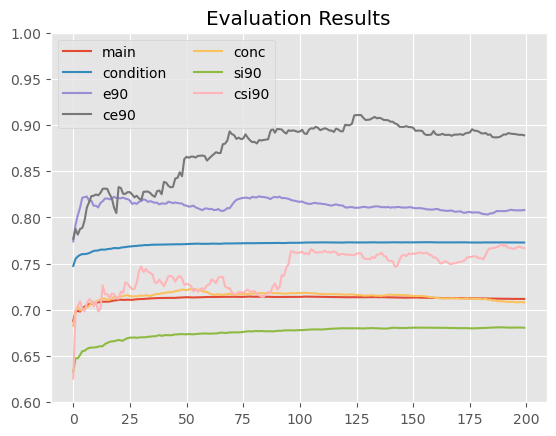

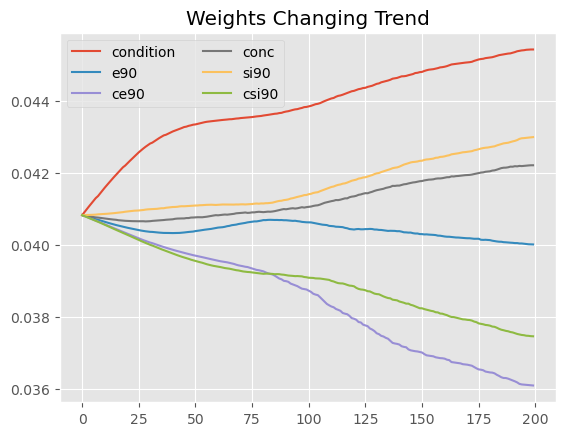

In [405]:
mtg.train()

### Model prediction

In [408]:
mtg.predict()

Test set size:  (26817, 79)
Test main task shape:  26817  Test sub tasks shape:  (26817, 6)
inner_predict 187719
main task test metrics:  AUC  0.7132960689734569  logloss  0.44656758383587675  f1 score  0.33328850033624746


In [72]:
mtg.predict()

Test set size:  (334928, 348)
Test main task shape:  334928  Test sub tasks shape:  (334928, 5)
inner_predict 2009568
main task test metrics:  AUC  0.9525248859027033  logloss  0.26403032238114094  f1 score  0.8492427747833373


In [13]:
mtg.predict()

Test set size:  (334928, 348)
Test main task shape:  334928  Test sub tasks shape:  (334928, 5)
inner_predict 2009568
main task test metrics:  AUC  0.9534722019856692  logloss  0.2595711336260785  f1 score  0.8510244877561219


In [335]:
mtg.df_pred

,is_abuse,condition,e90,ce90,conc,si90,csi90
0,0.298350,0.280044,0.258953,0.259190,0.261669,0.282010,0.258790
1,0.337443,0.315360,0.259258,0.258453,0.263569,0.287386,0.258792
2,0.299880,0.279041,0.258549,0.258802,0.270121,0.285948,0.259382
3,0.546702,0.462263,0.276610,0.258897,0.275240,0.347368,0.258185
4,0.304384,0.284294,0.258758,0.258643,0.264717,0.276551,0.258675
...,...,...,...,...,...,...,...
26812,0.316932,0.287541,0.259047,0.261336,0.261280,0.279422,0.261579
26813,0.309047,0.280732,0.258886,0.258758,0.261935,0.291327,0.258878
26814,0.389441,0.380292,0.262816,0.259101,0.276086,0.292700,0.259581
26815,0.462221,0.426989,0.264888,0.259842,0.269613,0.274945,0.258936


In [409]:
df_test = df_test.reset_index(drop=True)
df_test.head()

,Abuse__DOT__completed_afn_orders_by_customer_marketplace__DOT__n_afn_unit_amount_last_365_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_90_days,Abuse__DOT__cluster_edx_intransit_by_customer_marketplace_na__DOT__n_cluster_max_intransit_si_last_180_days,Abuse__DOT__cluster_nonsellable_returns_by_customer_marketplace__DOT__n_cluster_nsr_unit_count_last_90_days,payment_risk__DOT__customer_contacts_by_customerid_precomp_region__DOT__n_customer_contact_by_phone_cnt_30d,Abuse__DOT__cluster_mfn_refunds_by_customer_marketplace__DOT__n_cluster_mfn_refund_unit_amount_last_180_days,ORDER_TOTAL,Abuse__DOT__cluster_completed_afn_orders_by_customer_marketplace__DOT__n_cluster_afn_unit_count_last_90_days,Abuse__DOT__notr_forwardlooking_si_by_customer_marketplace__DOT__n_notr_forwardlooking_si_last_180_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_365_days,...,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_30_days,marketplacId,is_abuse,condition,e90,ce90,conc,si90,csi90,multiclass
0,6320.14,0.000000,0.00,1,0,0.00,99.99,69,0.030656,0.009933,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg
1,583.68,0.368828,0.00,1,0,0.00,74.90,3,0.238763,0.147170,...,0.368828,32,0,0,0,0,0,0.0,0.0,neg
2,14244.57,0.145813,0.91,4,0,0.00,116.97,100,0.033197,0.099688,...,0.074230,15,0,0,0,0,0,0.0,0.0,neg
3,4734.09,0.595828,7.57,11,0,18.44,39.99,37,0.015218,0.512988,...,0.733209,15,0,0,0,0,0,0.0,0.0,neg
4,2712.09,0.000000,0.00,0,0,36.98,31.99,20,0.023149,0.068692,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg


In [410]:
df_test.head()

,Abuse__DOT__completed_afn_orders_by_customer_marketplace__DOT__n_afn_unit_amount_last_365_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_90_days,Abuse__DOT__cluster_edx_intransit_by_customer_marketplace_na__DOT__n_cluster_max_intransit_si_last_180_days,Abuse__DOT__cluster_nonsellable_returns_by_customer_marketplace__DOT__n_cluster_nsr_unit_count_last_90_days,payment_risk__DOT__customer_contacts_by_customerid_precomp_region__DOT__n_customer_contact_by_phone_cnt_30d,Abuse__DOT__cluster_mfn_refunds_by_customer_marketplace__DOT__n_cluster_mfn_refund_unit_amount_last_180_days,ORDER_TOTAL,Abuse__DOT__cluster_completed_afn_orders_by_customer_marketplace__DOT__n_cluster_afn_unit_count_last_90_days,Abuse__DOT__notr_forwardlooking_si_by_customer_marketplace__DOT__n_notr_forwardlooking_si_last_180_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_365_days,...,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_30_days,marketplacId,is_abuse,condition,e90,ce90,conc,si90,csi90,multiclass
0,6320.14,0.000000,0.00,1,0,0.00,99.99,69,0.030656,0.009933,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg
1,583.68,0.368828,0.00,1,0,0.00,74.90,3,0.238763,0.147170,...,0.368828,32,0,0,0,0,0,0.0,0.0,neg
2,14244.57,0.145813,0.91,4,0,0.00,116.97,100,0.033197,0.099688,...,0.074230,15,0,0,0,0,0,0.0,0.0,neg
3,4734.09,0.595828,7.57,11,0,18.44,39.99,37,0.015218,0.512988,...,0.733209,15,0,0,0,0,0,0.0,0.0,neg
4,2712.09,0.000000,0.00,0,0,36.98,31.99,20,0.023149,0.068692,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg


In [411]:
df_test.orderTotalAmountUSD.head()

0    71.66
1    12.91
2    84.02
3    28.38
4    22.69
Name: orderTotalAmountUSD, dtype: float64

In [412]:
df_test_pred = df_test[
    ["is_abuse", "condition", "e90", "ce90", "conc", "si90", "csi90"]
]
df_test_pred.shape

(26817, 7)

In [413]:
df_test_pred["is_abuse_pred"] = mtg.df_pred["is_abuse"]
df_test_pred["condition_pred"] = mtg.df_pred["condition"]
df_test_pred["e90_pred"] = mtg.df_pred["e90"]
df_test_pred["ce90_pred"] = mtg.df_pred["ce90"]
df_test_pred["conc_pred"] = mtg.df_pred["conc"]
df_test_pred["csi90_pred"] = mtg.df_pred["csi90"]
df_test_pred.shape

/tmp/ipykernel_22507/1118039508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pred['is_abuse_pred']=mtg.df_pred['is_abuse']
/tmp/ipykernel_22507/1118039508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pred['condition_pred']=mtg.df_pred['condition']
/tmp/ipykernel_22507/1118039508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

(26817, 13)

In [414]:
df_test_pred["orderTotalAmountUSD"] = df_test.orderTotalAmountUSD
df_test_pred.head()

/tmp/ipykernel_22507/99837686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pred['orderTotalAmountUSD']=df_test.orderTotalAmountUSD


,is_abuse,condition,e90,ce90,conc,si90,csi90,is_abuse_pred,condition_pred,e90_pred,ce90_pred,conc_pred,csi90_pred,orderTotalAmountUSD
0,0,0,0,0,0,0.0,0.0,0.139043,0.063799,0.002172,0.000783,0.015940,0.001326,71.66
1,0,0,0,0,0,0.0,0.0,0.228138,0.106531,0.003546,0.003257,0.025080,0.001614,12.91
2,0,0,0,0,0,0.0,0.0,0.138988,0.050497,0.003805,0.001641,0.028108,0.003307,84.02
3,0,0,0,0,0,0.0,0.0,0.861439,0.443331,0.015095,0.002384,0.108804,0.000703,28.38
4,0,0,0,0,0,0.0,0.0,0.151285,0.082278,0.002591,0.001219,0.021220,0.001298,22.69


In [415]:
df_test_pred.to_csv("df_test_pred.csv", index=False)